# Project: Investigate tmdb_movies Dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#cleaning">Data Cleaning</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

* Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.
* There are some odd characters in the ‘cast’ column. Don’t worry about cleaning them. You can leave them as is.
* The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.

File description
tmdb_movies.csv - the dataset

Data fields
There are 22 variables:

* id - id of the movie
* title - title of the movie
* homepage - homepage of the movie
* genres - genres of the movie
* keywords - keywords of the movie
* overview - overview of the movie
* tagline - tagline of the movie
* runtime - duration of runtime of the movie
* spoken_languages - spoken languages of the movie
* original_language - original language of the movie
* original_title - original title of the movie
* production_companies - production companies of the movie
* production_countries - production countries of the movie
* release_date - release date of the movie
* budget - budget of the movie
* revenue - revenue of the movie
* status - status of the movie
* popularity - popularity score of the movie
* cast - cast of the movie
* crew - crew of the movie
* vote_count - the count of votes for the movie
* vote_average - the average votes for the movie


### Question(s) for Analysis
>**Tip**: Stated below are three (3) questions exploring over the course of this report. It addresses these questions in the **data analysis** and **conclusion** sections. 


> Questions to be answered:
1. What is the top ten movie count by the genre category?
2. Which of the genres are the most profitable?
3. What is the relationship between movie budget and movie revenue?

In [1]:
#  import statements for all of the packages that I plan to use
#   plan to use.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, I loaded the tmdb-movies data which is in comma separated values format (csv), checked the properties of the data (description, number of rows and columns, unique values in each columns) and checked for its cleanliness (checked for null values and data types errors).

### General Properties

In [2]:
# Load my data and return few lines in the dataframe. By default, it returns the first five records

df = pd.read_csv('tmdb-movies.csv') 

df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df['release_year'].max()

2015

In [4]:
#this checks for the number of rows and columns
df.shape

(10866, 21)

In [5]:
# this returns the datatypes of the columns
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [6]:
# It is good to do futher investigation to get the exact datatype (string) of the genres column 
# even when it appears to be an object
type(df['genres'][0])

str

In [7]:
# this returns the number of unique values in each column
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [9]:
#checking for duplicates
df.duplicated().sum()

1

In [10]:
#removing duplicate found
df.drop_duplicates(inplace=True)

In [11]:
#Checking to see that there are no more duplicates
df.duplicated().sum()

0

In [12]:
# this returns useful descriptive statistics for each column of data
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10865.000000,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,10865.000000,10865.000000,1.086500e+04,1.086500e+04
mean,66066.374413,0.646446,1.462429e+07,3.982690e+07,102.071790,217.399632,5.975012,2001.321859,1.754989e+07,5.136900e+07
std,92134.091971,1.000231,3.091428e+07,1.170083e+08,31.382701,575.644627,0.935138,12.813260,3.430753e+07,1.446383e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.000000,0.207575,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20662.000000,0.383831,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75612.000000,0.713857,1.500000e+07,2.400000e+07,111.000000,146.000000,6.600000,2011.000000,2.085325e+07,3.370173e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [13]:
# this shows the index number and label for each column
def column_labels():
    for n, v in enumerate(df.columns):
        print(n, v)
column_labels()

0 id
1 imdb_id
2 popularity
3 budget
4 revenue
5 original_title
6 cast
7 homepage
8 director
9 tagline
10 keywords
11 overview
12 runtime
13 genres
14 production_companies
15 release_date
16 vote_count
17 vote_average
18 release_year
19 budget_adj
20 revenue_adj


<a id='cleaning'></a>
### Data Cleaning

> In this section of the report, after checking the properties and cleanliness of the data, I used the info() function to get a better grasp of the datatypes and its constraints, changed data types of some columns, dropped duplicates in two columns, couldn't filled nulls values with zero(0) or mean as the columns that contains nulls are not integer or float datatypes, I also didn't fill with any default value.

In [14]:
# this displays a concise summary of the dataframe,
# including the number of non-null values in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10865 non-null  int64  
 1   imdb_id               10855 non-null  object 
 2   popularity            10865 non-null  float64
 3   budget                10865 non-null  int64  
 4   revenue               10865 non-null  int64  
 5   original_title        10865 non-null  object 
 6   cast                  10789 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10821 non-null  object 
 9   tagline               8041 non-null   object 
 10  keywords              9372 non-null   object 
 11  overview              10861 non-null  object 
 12  runtime               10865 non-null  int64  
 13  genres                10842 non-null  object 
 14  production_companies  9835 non-null   object 
 15  release_date       

In [15]:
df["budget_adj"]=df["budget_adj"].astype('int')
df["release_date"]=df["release_date"].astype('datetime64[ns]')
df["id"]=df["id"].astype('object')
df["revenue_adj"]=df["revenue_adj"].astype('int')

In [16]:
df = df.drop_duplicates(subset=['id','imdb_id'],keep='first')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    10865 non-null  object        
 1   imdb_id               10855 non-null  object        
 2   popularity            10865 non-null  float64       
 3   budget                10865 non-null  int64         
 4   revenue               10865 non-null  int64         
 5   original_title        10865 non-null  object        
 6   cast                  10789 non-null  object        
 7   homepage              2936 non-null   object        
 8   director              10821 non-null  object        
 9   tagline               8041 non-null   object        
 10  keywords              9372 non-null   object        
 11  overview              10861 non-null  object        
 12  runtime               10865 non-null  int64         
 13  genres          

<a id='eda'></a>
## Exploratory Data Analysis

> In this section of the report, I am answering two research questions (listed in the introductory section). 

> For the first research question, I checked for the unique categories in the genred column, calculated the count of movies by each genre category using the groupby function, arranged it in a descending order, limited it to ten (10) records, loaded the output to a dataframe, reset index and plotted a horizontal bar chart to visualize the output.

> For the second research question, I generated a new calculated column for adjusted profit using the revenue_adj column minus the budget_adj column, calculated the sum of adjusted profit by each genre category using the groupby function, arranged it in a descending order, limited it to ten (10) records, loaded the output to a dataframe, reset index and plotted a horizontal bar chart to visualize the output.

### Research Question 1: What is the top ten movie count by the genre category?

In [17]:
#check for unique categories in the genres column
df['genres'].unique()

array(['Action|Adventure|Science Fiction|Thriller',
       'Adventure|Science Fiction|Thriller',
       'Action|Adventure|Science Fiction|Fantasy', ...,
       'Adventure|Drama|Action|Family|Foreign',
       'Comedy|Family|Mystery|Romance',
       'Mystery|Science Fiction|Thriller|Drama'], dtype=object)

In [18]:
#Count of movies by grouping the genres category
#order the count in a descending format
df_count_by_genres = df.groupby('genres')['id'].count().sort_values(ascending = False)

#limit the rows to ten(10)
df_count_by_genres = df_count_by_genres.head(10)

#check the output
df_count_by_genres

genres
Comedy                  712
Drama                   712
Documentary             312
Drama|Romance           289
Comedy|Drama            280
Comedy|Romance          268
Horror|Thriller         259
Horror                  253
Comedy|Drama|Romance    222
Drama|Thriller          138
Name: id, dtype: int64

In [19]:
#Load output into a dataframe
df_count_by_genres = df_count_by_genres.to_frame(name=None)

In [20]:
#Use the reset_index() function to create an index
#I didn't want the genres column to be the index, as it was the index by default while the dataframe was created
df_count_by_genres = df_count_by_genres.reset_index()

#checked for what the dataframe looks like
df_count_by_genres

,genres,id
0,Comedy,712
1,Drama,712
2,Documentary,312
3,Drama|Romance,289
4,Comedy|Drama,280
5,Comedy|Romance,268
6,Horror|Thriller,259
7,Horror,253
8,Comedy|Drama|Romance,222
9,Drama|Thriller,138


In [21]:
#replaced the column names with new names 
df_count_by_genres.rename(columns = {'genres' : 'Genres', 'id' : 'Count'}, inplace = True)

#check the output
df_count_by_genres

,Genres,Count
0,Comedy,712
1,Drama,712
2,Documentary,312
3,Drama|Romance,289
4,Comedy|Drama,280
5,Comedy|Romance,268
6,Horror|Thriller,259
7,Horror,253
8,Comedy|Drama|Romance,222
9,Drama|Thriller,138


Text(0, 0.5, 'Genres')

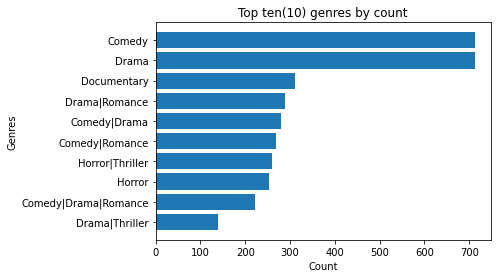

In [22]:
#Plot the top 10 genres by adjusted profit
plt.barh(df_count_by_genres.Genres, df_count_by_genres.Count)
plt.gca().invert_yaxis()
plt.title('Top ten(10) genres by count')
plt.xlabel('Count')
plt.ylabel('Genres')

From the Bar chart, I can see that the top trending genres are Comedy and Drama which have a large margin difference compared to the other genres in the top ten categories. 
I also noticed that in other genres that comedy and drama appear repeatedly among the top ten.
Comedy, Drama, Documentary, Romance, Horror, Thriller are the unique genres appearing among the top ten genre categories.

### Research Question 2: Which of the genres are the most profitable?

In [23]:
#create calculated column for adjusted profit
def profit(a):
    a['profit_adj'] = a.revenue_adj-a.budget_adj
    return a

#check the first five rows
profit(df)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,137999939,1392445892,1254445953
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,137999939,348161292,210161353
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,101199955,271619025,170419070
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,183999919,1902723129,1718723210
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,174799923,1385748801,1210948878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,95,Documentary,Bruce Brown Films,2066-06-15,11,7.4,1966,0,0,0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,2066-12-21,20,5.7,1966,0,0,0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,94,Mystery|Comedy,Mosfilm,2066-01-01,11,6.5,1966,0,0,0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,80,Action|Comedy,Benedict Pictures Corp.,2066-11-02,22,5.4,1966,0,0,0


In [24]:
#convert the profit_adj column to integer data type
df["profit_adj"]=df["profit_adj"].astype('int')

#check the first five rows
df["profit_adj"].head()

0    1254445953
1     210161353
2     170419070
3    1718723210
4    1210948878
Name: profit_adj, dtype: int32

In [25]:
#sum of adjusted profit by grouping the genres category
#order the sum of adjusted profit in a descending format
df_profit_by_genres = df.groupby('genres')['profit_adj'].sum().sort_values(ascending = False)

#limit the rows to ten(10)
df_profit_by_genres = df_profit_by_genres.head(10)

#check the output
df_profit_by_genres

genres
Comedy                              1.716410e+10
Drama                               1.376784e+10
Comedy|Romance                      1.047115e+10
Adventure|Action|Thriller           9.070750e+09
Adventure|Action|Science Fiction    7.723684e+09
Comedy|Drama|Romance                7.600808e+09
Adventure|Fantasy|Action            6.557370e+09
Drama|Romance                       5.860265e+09
Adventure|Fantasy|Family            5.487351e+09
Animation|Family                    5.230636e+09
Name: profit_adj, dtype: float64

In [26]:
#Load output into a dataframe
df_profit_by_genres = df_profit_by_genres.to_frame(name=None)

In [27]:
#Use the reset_index() function to create an index
#I didn't want the genres column to be the index, as it was the index by default while the dataframe was created
df_profit_by_genres = df_profit_by_genres.reset_index()

#checked for what the dataframe looks like
df_profit_by_genres

,genres,profit_adj
0,Comedy,1.716410e+10
1,Drama,1.376784e+10
2,Comedy|Romance,1.047115e+10
3,Adventure|Action|Thriller,9.070750e+09
4,Adventure|Action|Science Fiction,7.723684e+09
5,Comedy|Drama|Romance,7.600808e+09
6,Adventure|Fantasy|Action,6.557370e+09
7,Drama|Romance,5.860265e+09
8,Adventure|Fantasy|Family,5.487351e+09
9,Animation|Family,5.230636e+09


In [28]:
#check the exact figure of the top 1 profit making genre (comedy)
df_profit_by_genres['profit_adj'][0]

17164101225.0

Text(0, 0.5, 'Genres')

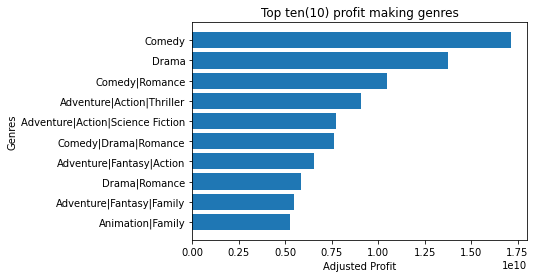

In [29]:
#Plot the top 10 genres by adjusted profit
plt.barh(df_profit_by_genres.genres, df_profit_by_genres.profit_adj)
plt.gca().invert_yaxis()
plt.title('Top ten(10) profit making genres')
plt.xlabel('Adjusted Profit')
plt.ylabel('Genres')

From the bar chart, I noticed that comedy and drama have the highest profitability with comedy in the leading place. 
Comedy and drama features more than two time in the top ten.
* The unique genres featured are: Comedy, Drama, Romance, Adventure, Action, Thriller, Science Fiction, Fantasy, Family and Animation.

### Research Question 3: What is the relationship between movie budget and movie revenue?

Text(0.5, 0, 'Budget')

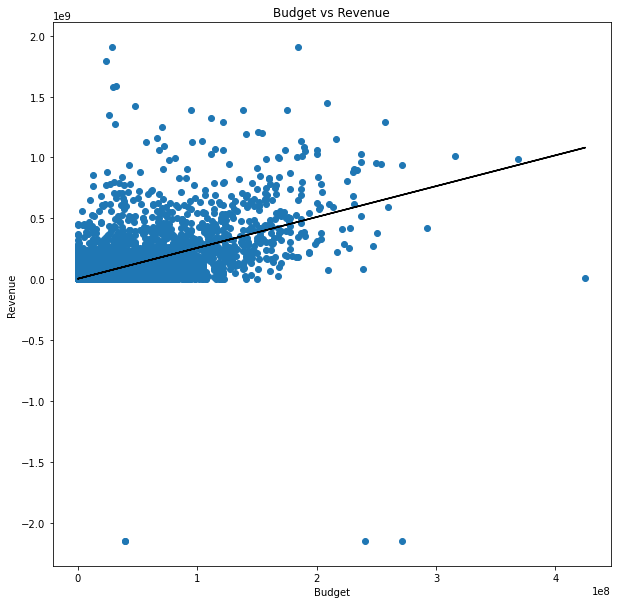

In [30]:
#Plotting the relationship between budget and revenue

y=np.array(df['budget_adj'])
z=np.array(df['revenue_adj'])
a=np.polyfit(y,z,1)
b=np.poly1d(a)

rcParams['figure.figsize']=[10,10]
plt.scatter(y,z)
plt.plot(y,b(y),color='black')
plt.title('Budget vs Revenue')
plt.ylabel('Revenue')
plt.xlabel('Budget')

From the scatter plot, there is a positive correlation between movie budget and revenue, which suggests (suggestion is being made as it has not been concluded but can be assumed that there is a causal relationship between budget and revenue) and  that as budgets increases, revenue tends to increase by about 60% .The specific percentage (about 60%) is gotten by checking for the correlation of budget with other variables using the correlation function below.


In [31]:
#Check for the correlation
df.corr()['budget_adj']

popularity      0.513555
budget          0.968963
revenue         0.706446
runtime         0.221127
vote_count      0.587062
vote_average    0.093079
release_year    0.016771
budget_adj      1.000000
revenue_adj     0.608957
profit_adj      0.478222
Name: budget_adj, dtype: float64

In [32]:
df1 = df[(df['genres'] == 'Comedy') | (df['genres'] == 'Drama')]
df1.genres.unique()

array(['Comedy', 'Drama'], dtype=object)

Text(0.5, 0, 'Budget')

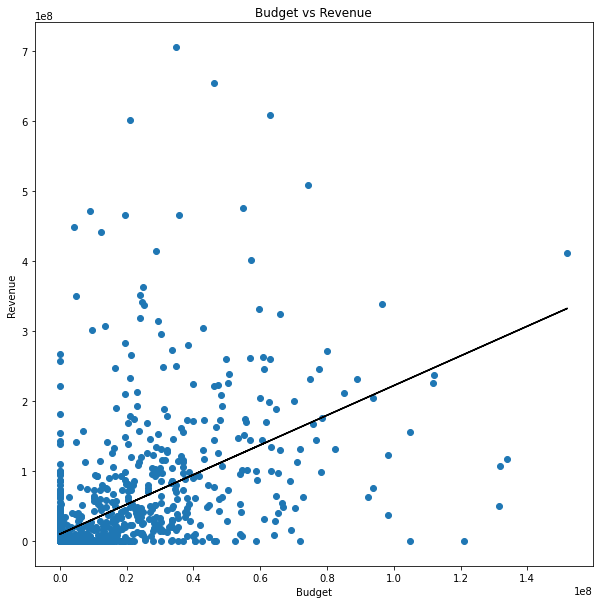

In [33]:
#Plotting the relationship between budget and revenue

y=np.array(df1['budget_adj'])
z=np.array(df1['revenue_adj'])
a=np.polyfit(y,z,1)
b=np.poly1d(a)

rcParams['figure.figsize']=[10,10]
plt.scatter(y,z)
plt.plot(y,b(y),color='black')
plt.title('Budget vs Revenue')
plt.ylabel('Revenue')
plt.xlabel('Budget')

From the scatter plot, there is a positive correlation between budget and revenue for only Comedy and Drama genres which suggests that there is a positive relationship but it is however not a strong positive correlation and it shows that as budgets increases, revenue tends to increase by about 50% (this specific percentage is gotten by checking for the correlation of budget with other variables using the correlation function below).

In [34]:
df1.corr()['budget_adj']

popularity      0.421057
budget          0.966694
revenue         0.608433
runtime         0.265774
vote_count      0.425072
vote_average    0.050865
release_year   -0.024946
budget_adj      1.000000
revenue_adj     0.547962
profit_adj      0.327347
Name: budget_adj, dtype: float64

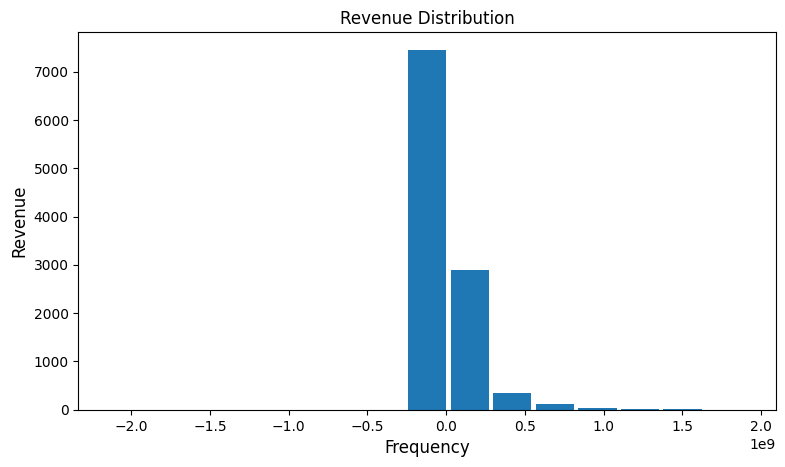

In [59]:
#Plot a histogram shows the budget distribution
#stating the size of the plot(width, height)
plt.figure(figsize=(9,5), dpi = 100)

#x-axis 
plt.xlabel('Frequency', fontsize = 12)
#y-axis 
plt.ylabel('Revenue', fontsize=12)
#Title of the plot
plt.title('Revenue Distribution', fontsize=12)

#defining the column to plot
plt.hist(df['revenue_adj'], rwidth = 0.9, bins =15)
#displays the plot
plt.show()

From the histogram plotted it can be seen that the revenue is skewed to the right. A large frequency of the revenue falls between -0.25 and 0.25. However, more than 7000 movies had negative revenue amount, close to 3000 movies had a positive amount between 0.1 and 0.25, others fall within the range of 0.25 and about 1.7. 

Based on the plot, this shows that the larger percentage of movies have negative revenues.

C:\Users\mitim\AppData\Roaming\Python\Python36\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Runtime Distribution')

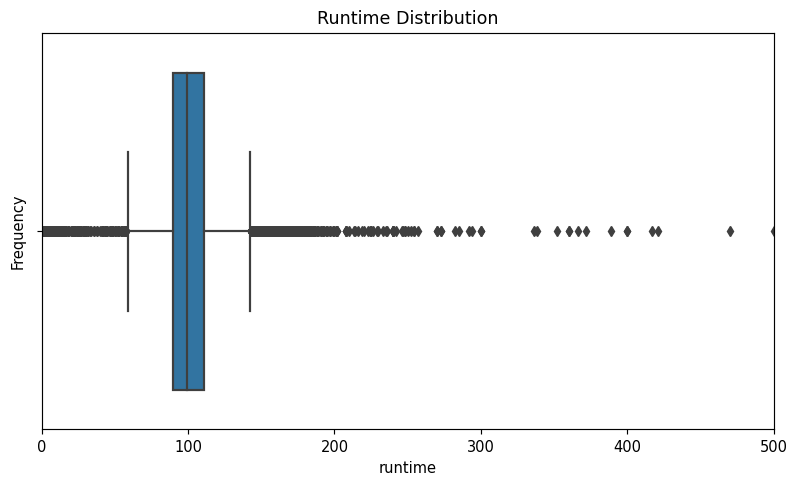

In [79]:
#analyzing the runtime column using box plot
plt.figure(figsize=(9,5), dpi = 105)
sns.boxplot(df.runtime)
plt.xlim(0,500)
plt.ylabel('Frequency')
plt.title('Runtime Distribution')

From the box plot above, I can see that a large percentage of the data is between 90 to 110 minutes range, and there are other outlier. I put a range of 0 to 500 after seeing the distribution of the runtime in order to get a clearer and less noisy view of the distribution of the runtime.

<a id='conclusions'></a>
## Conclusions

> Working with the TMBD_movies datasets, My analysis was about answering the questions I posed above. I had to do data quality checks such as ensuring that there were no missing values, no duplicate rows that were not needed, columns needed were in the right format. 
My analysis showed that from 1960 to 2015, more of Comedy and Drama movies were released. It also showed that Comedy and Drama had the highest profit between those years. It also revealed a positive correlation between budget and revenue.
Based on my analysis, I would suggest that in future, film production companies (both existing and emerging companies) can invest in producing Comedy and Drama.

> Limitation: Due to lack of data on duration it took to make the movie, I could not check if there was a relationship between duration of making the movie and some other factors such as budget, revenue, rating and popularity.



## Sources

> I used Pandas documentation, Numpy and Matplotlib documentation.